In [1]:
import tensorflow 
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense ,Flatten
import numpy as np
import matplotlib.pyplot as plt

2025-02-18 15:29:06.671508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
y_train.shape

(60000,)

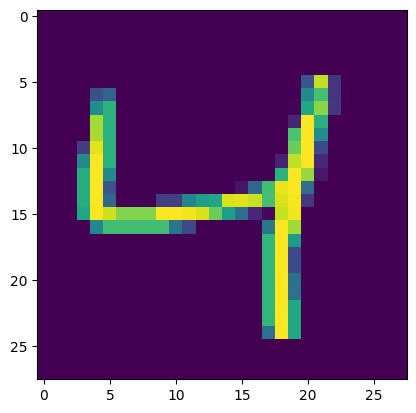

In [7]:
plt.imshow(X_train[2])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/home/nikhilds/anaconda3/envs/env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-18 15:29:08.750934: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-18 15:29:08.756504: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-18 1

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25


I0000 00:00:1739872750.153355  104528 service.cc:145] XLA service 0x7f7ae00091e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739872750.153385  104528 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-18 15:29:10.165729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-18 15:29:10.224732: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 196/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.6857 - loss: 1.0681

I0000 00:00:1739872750.850382  104528 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8637 - loss: 0.4726 - val_accuracy: 0.9542 - val_loss: 0.1521
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9592 - loss: 0.1383 - val_accuracy: 0.9625 - val_loss: 0.1279
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.9728 - loss: 0.0885 - val_accuracy: 0.9717 - val_loss: 0.0998
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.9799 - loss: 0.0641 - val_accuracy: 0.9716 - val_loss: 0.0922
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9854 - loss: 0.0484 - val_accuracy: 0.9724 - val_loss: 0.0931
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.9747 - val_loss: 0.0923
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.9912 - loss: 0.0295 - val_accuracy: 0.9738 - val_loss: 0.0940
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.9931 - loss: 0.0227

In [12]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
y_prob.shape

(10000, 10)

In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
y_pred.shape

(10000,)

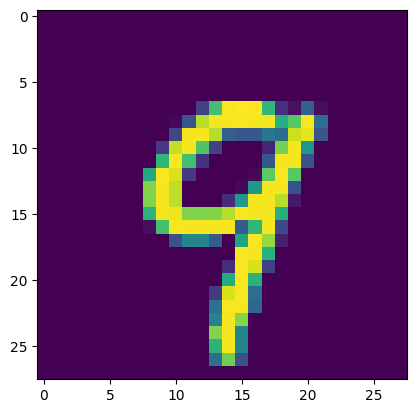

In [16]:
plt.imshow(X_test[12])

In [17]:
model.predict(X_test[12].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([9])

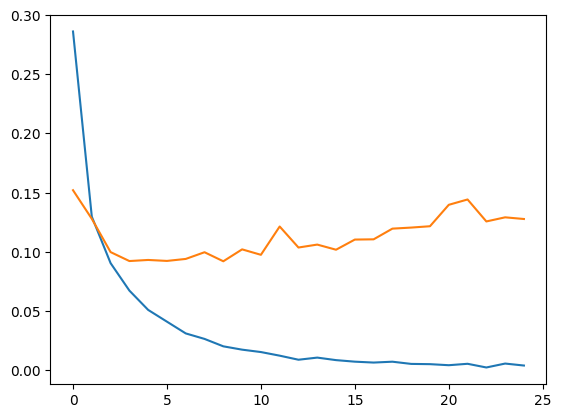

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

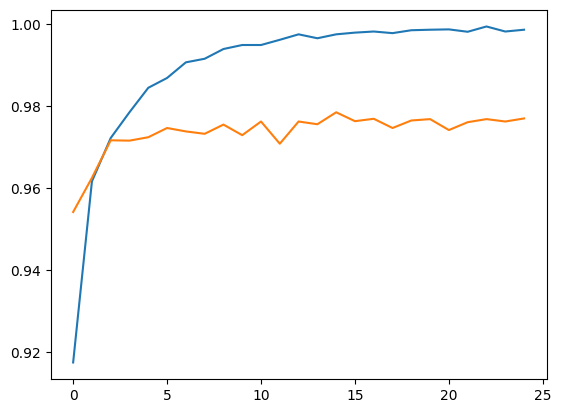

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])